# 生成对抗网络
GAN 就是: Generator 是新手画家, Discriminator 是新手鉴赏家, 你是高级鉴赏家. 你将著名画家的品和新手画家的作品都给新手鉴赏家评定, 并告诉新手鉴赏家哪些是新手画家画的, 哪些是著名画家画的, 新手鉴赏家就慢慢学习怎么区分新手画家和著名画家的画, 但是新手画家和新手鉴赏家是好朋友, 新手鉴赏家会告诉新手画家要怎么样画得更像著名画家, 新手画家就能将自己的突然来的灵感 (random noise) 画得更像著名画家. 我用一个短动画形式来诠释了整个过程 (GAN 动画简介).
<img src='gan.gif'></img>
下面是本节内容的效果, 绿线的变化是新手画家慢慢学习如何踏上画家之路的过程. 而能被认定为著名的画作在 upper bound 和 lower bound 之间.

# 超参数设置 
新手画家 (Generator) 在作画的时候需要有一些灵感 (random noise), 我们这些灵感的个数定义为 N_IDEAS. 而一幅画需要有一些规格, 我们将这幅画的画笔数定义一下, N_COMPONENTS 就是一条一元二次曲线(这幅画画)上的点个数. 为了进行批训练, 我们将一整批话的点都规定一下(PAINT_POINTS).

In [1]:
import torch 
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

#超参数
BATCH_SIZE = 64
LR_G = 0.0001
LR_D = 0.0001
N_IDEAS = 5
ART_COMPONENTS = 15
PAINT_POINTS = np.vstack([np.linspace(-1,1,ART_COMPONENTS)for _ in range(BATCH_SIZE)])

# 著名画家的画
我们需要有很多画是来自著名画家的(real data), 将这些著名画家的画, 和新手画家的画都传给新手鉴赏家, 让鉴赏家来区分哪些是著名画家, 哪些是新手画家的画. 如何区分我们在后面呈现. 这里我们生成一些著名画家的画 (batch 条不同的一元二次方程曲线).

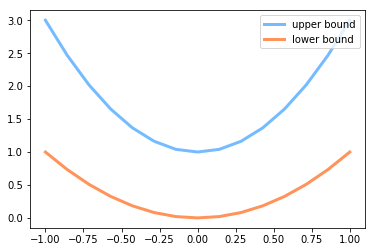

In [2]:
# show our beautiful painting range
plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
plt.legend(loc='upper right')
plt.show()

In [3]:
def artist_works(): #painting from the famous artist
    a = np.random.uniform(1,2,size=BATCH_SIZE)[:,np.newaxis]
    paintings = a*np.power(PAINT_POINTS,2)+(a-1)
    #print('paintings：',paintings)
    paintings = torch.from_numpy(paintings).float()
   
    return Variable(paintings)

# 神经网络
这里会创建两个神经网络, 分别是 Generator (新手画家), Discriminator(新手鉴赏家). G会拿着自己的一些灵感当做输入, 输出一元二次曲线上的点 (G 的画).
D会接收一幅画作 (一元二次曲线), 输出这幅画作到底是不是著名画家的画(是著名画家的画的概率).

In [4]:
Generator=nn.Sequential(
        nn.Linear(N_IDEAS,128),
        nn.ReLU(),
        nn.Linear(128,ART_COMPONENTS), #making a painting from random ideas 
)
Discriminator = nn.Sequential(
        nn.Linear(ART_COMPONENTS,128),
        nn.ReLU(),
        nn.Linear(128,1),
        nn.Sigmoid(), #tell the probability that the art work is made by artist
)

# 训练 
接着我们来同时训练 D 和 G. 训练之前, 我们来看看G作画的原理. G 首先会有些灵感, G_ideas 就会拿到这些随机灵感 (可以是正态分布的随机数), 然后 G 会根据这些灵感画画. 接着我们拿着著名画家的画和 G 的画, 让 D 来判定这两批画作是著名画家画的概率.

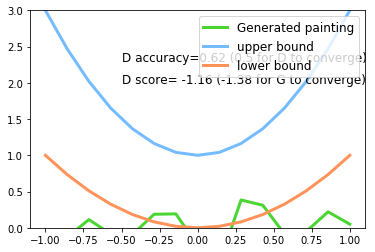

D_loss: Variable containing:
 1.1595
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6731
[torch.FloatTensor of size 1]



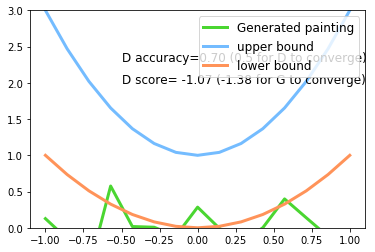

D_loss: Variable containing:
 1.0737
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7109
[torch.FloatTensor of size 1]



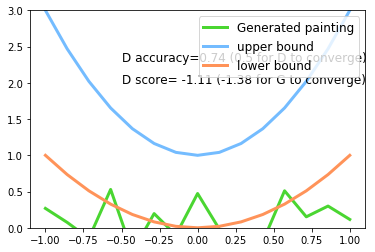

D_loss: Variable containing:
 1.1120
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.8089
[torch.FloatTensor of size 1]



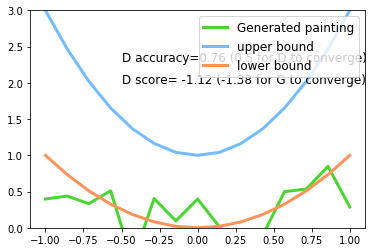

D_loss: Variable containing:
 1.1164
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.8409
[torch.FloatTensor of size 1]



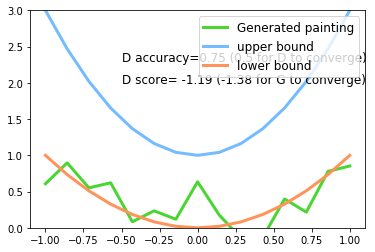

D_loss: Variable containing:
 1.1864
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.8977
[torch.FloatTensor of size 1]



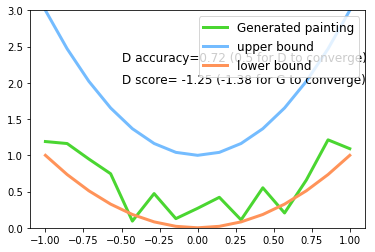

D_loss: Variable containing:
 1.2457
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.9135
[torch.FloatTensor of size 1]



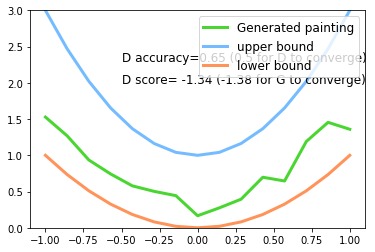

D_loss: Variable containing:
 1.3415
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.9044
[torch.FloatTensor of size 1]



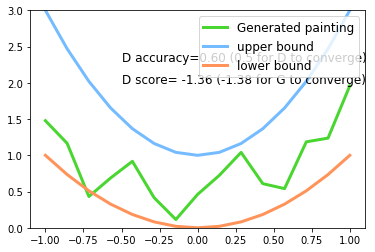

D_loss: Variable containing:
 1.3615
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.8417
[torch.FloatTensor of size 1]



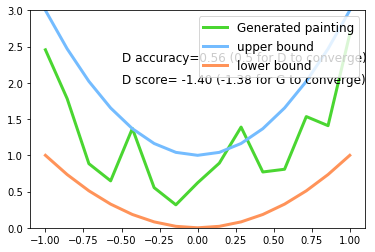

D_loss: Variable containing:
 1.4007
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.8210
[torch.FloatTensor of size 1]



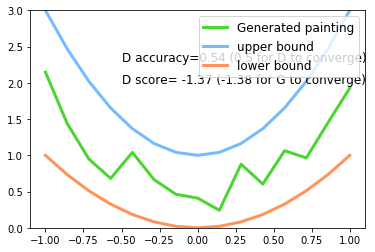

D_loss: Variable containing:
 1.3667
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7386
[torch.FloatTensor of size 1]



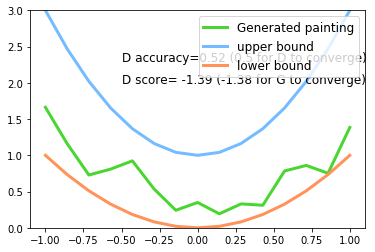

D_loss: Variable containing:
 1.3880
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7239
[torch.FloatTensor of size 1]



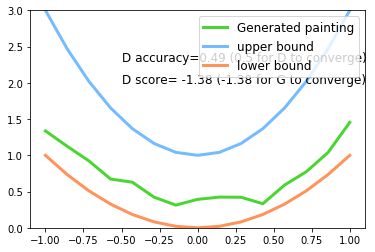

D_loss: Variable containing:
 1.3828
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6750
[torch.FloatTensor of size 1]



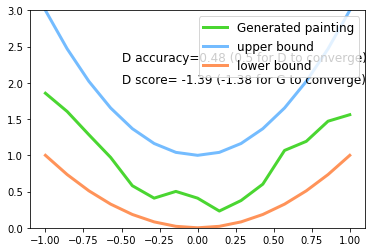

D_loss: Variable containing:
 1.3861
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6535
[torch.FloatTensor of size 1]



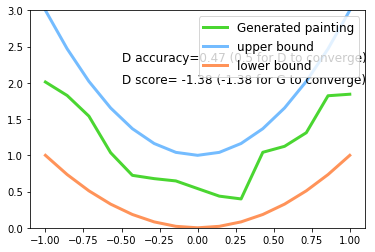

D_loss: Variable containing:
 1.3842
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6377
[torch.FloatTensor of size 1]



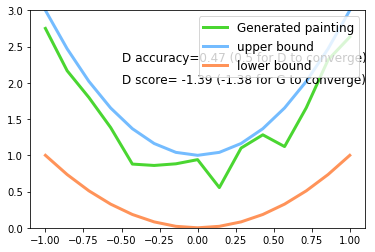

D_loss: Variable containing:
 1.3871
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6278
[torch.FloatTensor of size 1]



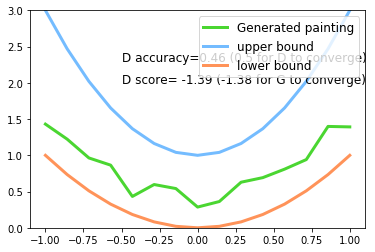

D_loss: Variable containing:
 1.3883
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6182
[torch.FloatTensor of size 1]



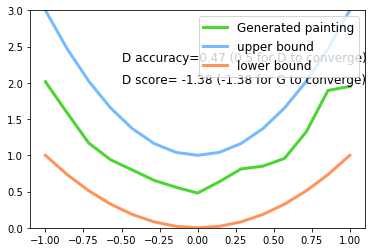

D_loss: Variable containing:
 1.3775
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6180
[torch.FloatTensor of size 1]



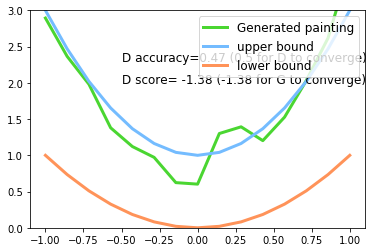

D_loss: Variable containing:
 1.3753
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6241
[torch.FloatTensor of size 1]



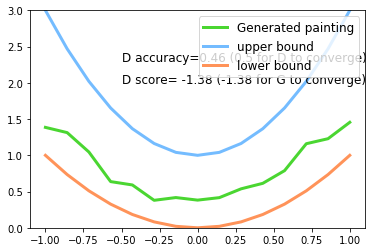

D_loss: Variable containing:
 1.3781
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6108
[torch.FloatTensor of size 1]



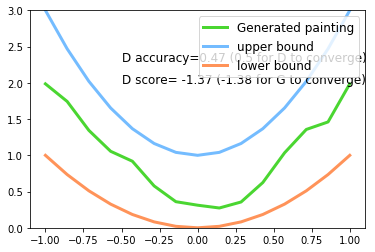

D_loss: Variable containing:
 1.3749
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6175
[torch.FloatTensor of size 1]



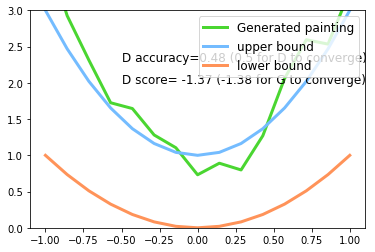

D_loss: Variable containing:
 1.3749
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6327
[torch.FloatTensor of size 1]



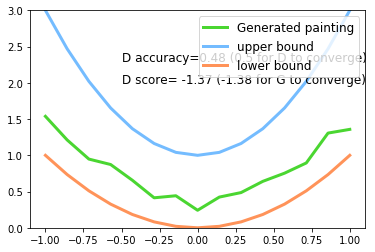

D_loss: Variable containing:
 1.3726
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6407
[torch.FloatTensor of size 1]



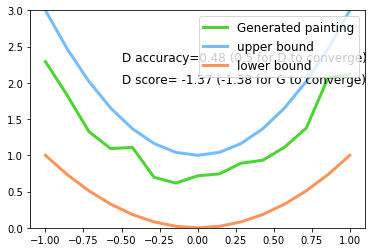

D_loss: Variable containing:
 1.3658
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6279
[torch.FloatTensor of size 1]



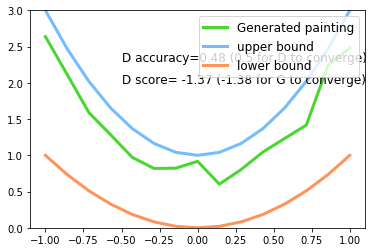

D_loss: Variable containing:
 1.3742
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6347
[torch.FloatTensor of size 1]



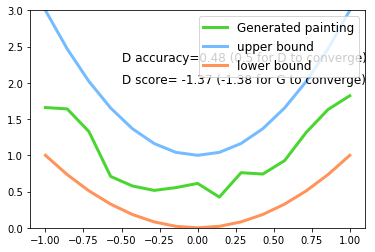

D_loss: Variable containing:
 1.3716
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6324
[torch.FloatTensor of size 1]



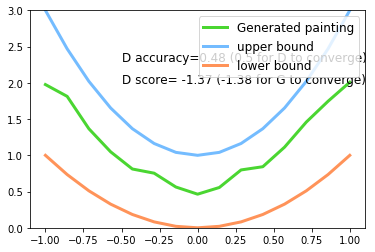

D_loss: Variable containing:
 1.3682
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6332
[torch.FloatTensor of size 1]



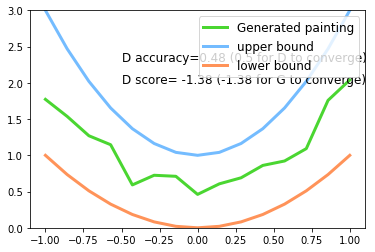

D_loss: Variable containing:
 1.3754
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6447
[torch.FloatTensor of size 1]



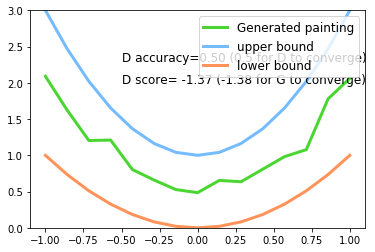

D_loss: Variable containing:
 1.3699
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6749
[torch.FloatTensor of size 1]



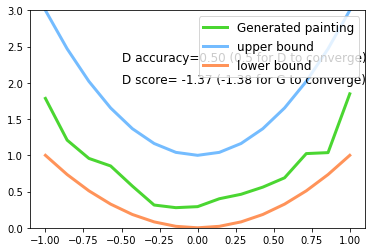

D_loss: Variable containing:
 1.3712
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6806
[torch.FloatTensor of size 1]



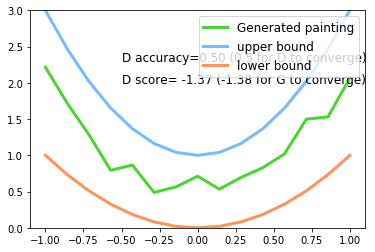

D_loss: Variable containing:
 1.3746
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6848
[torch.FloatTensor of size 1]



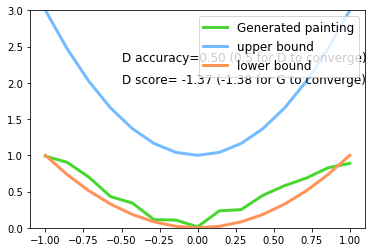

D_loss: Variable containing:
 1.3716
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6741
[torch.FloatTensor of size 1]



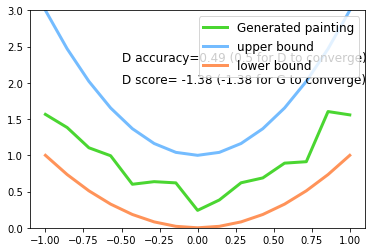

D_loss: Variable containing:
 1.3774
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6713
[torch.FloatTensor of size 1]



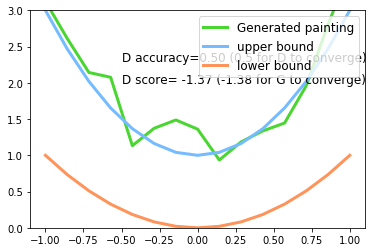

D_loss: Variable containing:
 1.3675
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6739
[torch.FloatTensor of size 1]



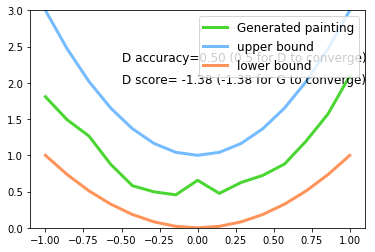

D_loss: Variable containing:
 1.3821
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6960
[torch.FloatTensor of size 1]



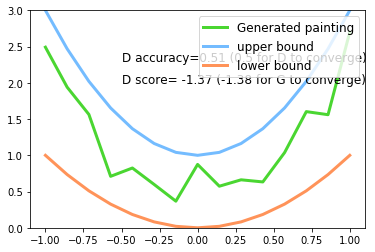

D_loss: Variable containing:
 1.3668
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6939
[torch.FloatTensor of size 1]



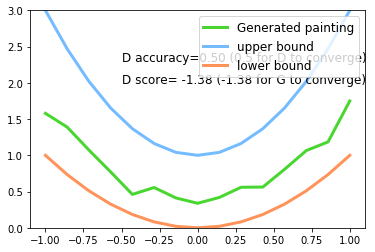

D_loss: Variable containing:
 1.3755
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6735
[torch.FloatTensor of size 1]



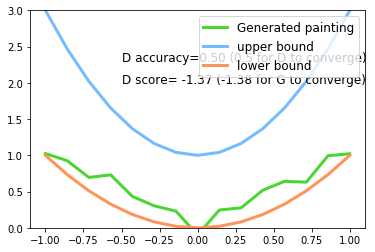

D_loss: Variable containing:
 1.3745
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6869
[torch.FloatTensor of size 1]



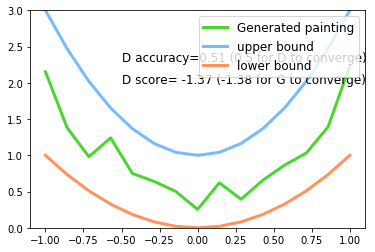

D_loss: Variable containing:
 1.3673
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7016
[torch.FloatTensor of size 1]



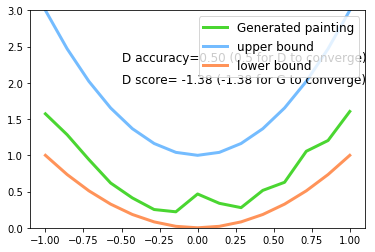

D_loss: Variable containing:
 1.3828
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6897
[torch.FloatTensor of size 1]



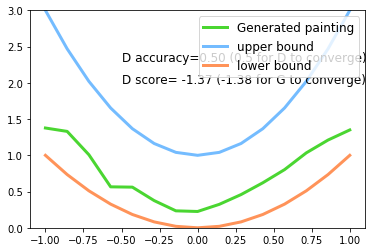

D_loss: Variable containing:
 1.3652
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6799
[torch.FloatTensor of size 1]



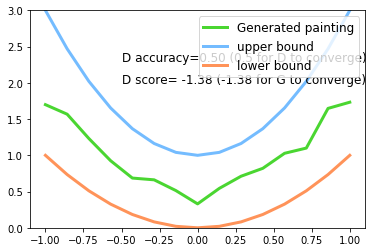

D_loss: Variable containing:
 1.3779
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6812
[torch.FloatTensor of size 1]



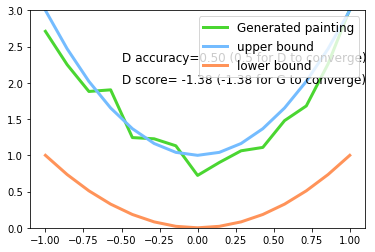

D_loss: Variable containing:
 1.3781
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6918
[torch.FloatTensor of size 1]



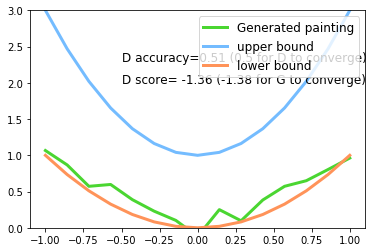

D_loss: Variable containing:
 1.3638
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6930
[torch.FloatTensor of size 1]



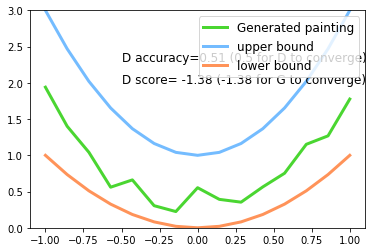

D_loss: Variable containing:
 1.3826
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7028
[torch.FloatTensor of size 1]



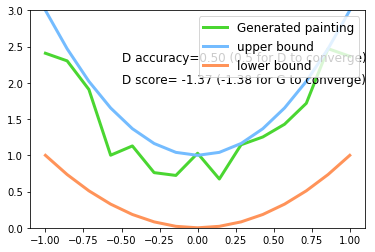

D_loss: Variable containing:
 1.3692
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6700
[torch.FloatTensor of size 1]



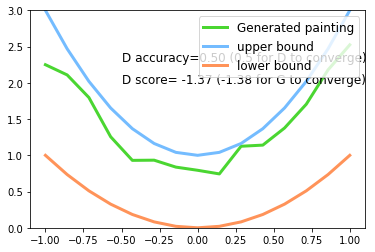

D_loss: Variable containing:
 1.3688
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6827
[torch.FloatTensor of size 1]



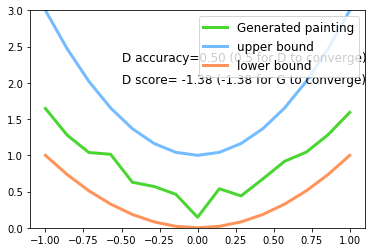

D_loss: Variable containing:
 1.3811
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6905
[torch.FloatTensor of size 1]



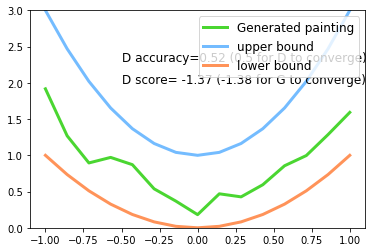

D_loss: Variable containing:
 1.3691
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7078
[torch.FloatTensor of size 1]



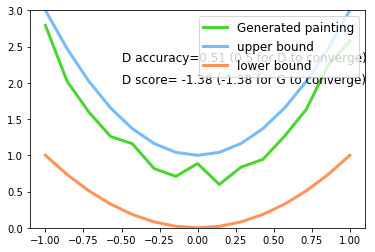

D_loss: Variable containing:
 1.3764
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7023
[torch.FloatTensor of size 1]



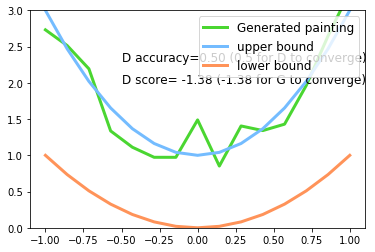

D_loss: Variable containing:
 1.3770
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6808
[torch.FloatTensor of size 1]



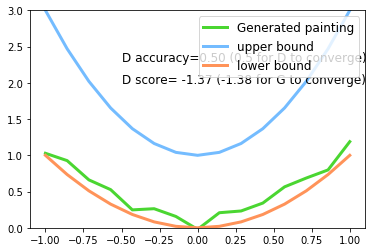

D_loss: Variable containing:
 1.3674
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6689
[torch.FloatTensor of size 1]



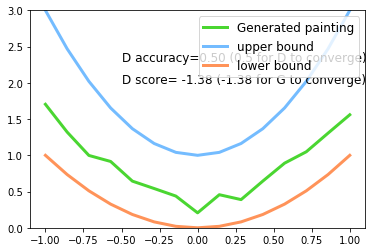

D_loss: Variable containing:
 1.3814
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6913
[torch.FloatTensor of size 1]



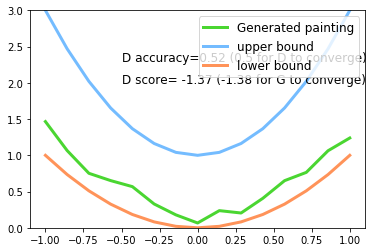

D_loss: Variable containing:
 1.3749
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7123
[torch.FloatTensor of size 1]



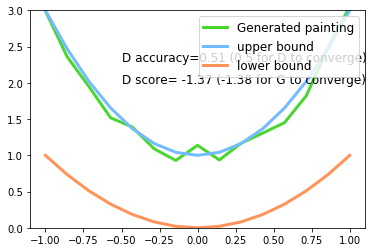

D_loss: Variable containing:
 1.3750
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7031
[torch.FloatTensor of size 1]



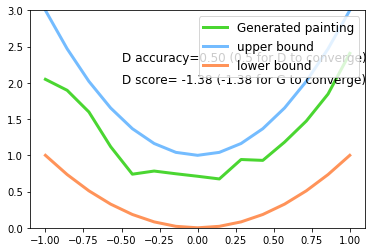

D_loss: Variable containing:
 1.3762
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6834
[torch.FloatTensor of size 1]



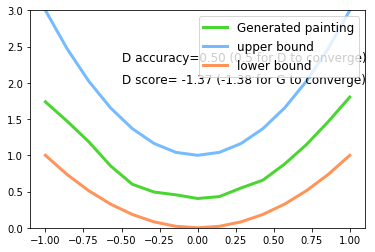

D_loss: Variable containing:
 1.3741
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6713
[torch.FloatTensor of size 1]



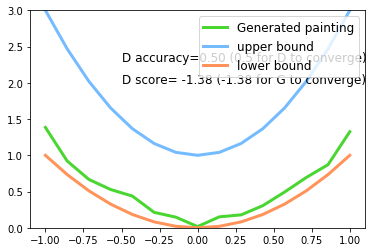

D_loss: Variable containing:
 1.3771
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6849
[torch.FloatTensor of size 1]



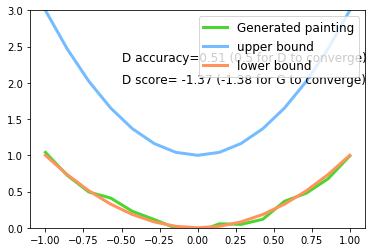

D_loss: Variable containing:
 1.3734
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7065
[torch.FloatTensor of size 1]



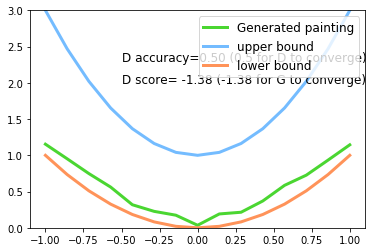

D_loss: Variable containing:
 1.3766
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6813
[torch.FloatTensor of size 1]



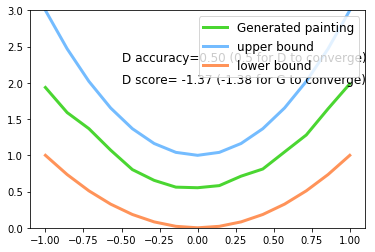

D_loss: Variable containing:
 1.3742
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6829
[torch.FloatTensor of size 1]



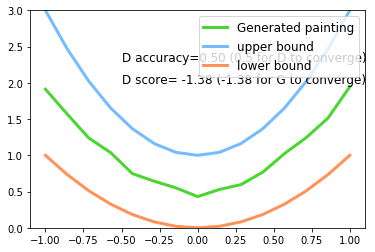

D_loss: Variable containing:
 1.3777
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6834
[torch.FloatTensor of size 1]



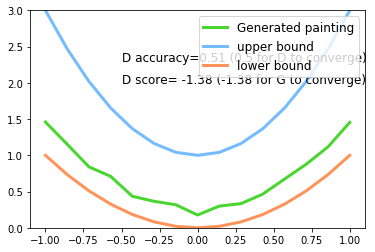

D_loss: Variable containing:
 1.3757
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6975
[torch.FloatTensor of size 1]



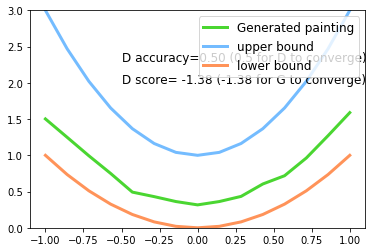

D_loss: Variable containing:
 1.3758
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6924
[torch.FloatTensor of size 1]



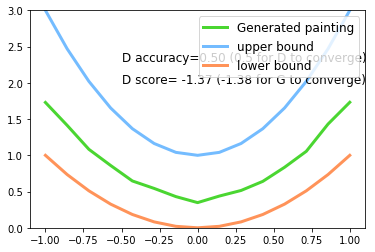

D_loss: Variable containing:
 1.3744
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6770
[torch.FloatTensor of size 1]



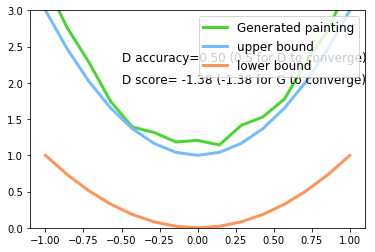

D_loss: Variable containing:
 1.3798
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6948
[torch.FloatTensor of size 1]



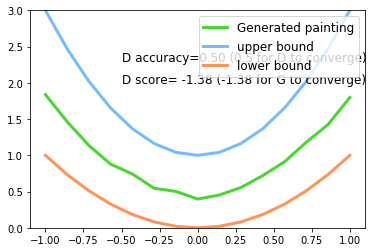

D_loss: Variable containing:
 1.3758
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6815
[torch.FloatTensor of size 1]



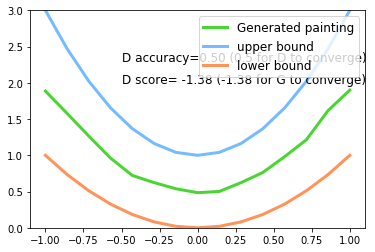

D_loss: Variable containing:
 1.3761
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6904
[torch.FloatTensor of size 1]



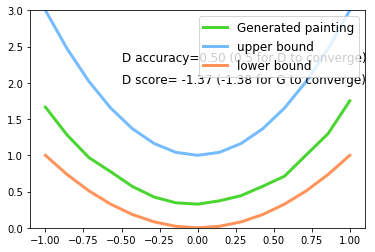

D_loss: Variable containing:
 1.3737
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6889
[torch.FloatTensor of size 1]



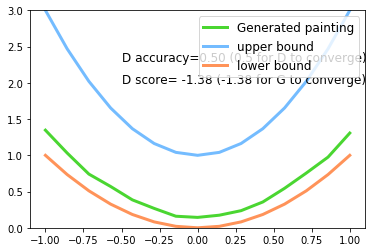

D_loss: Variable containing:
 1.3780
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6922
[torch.FloatTensor of size 1]



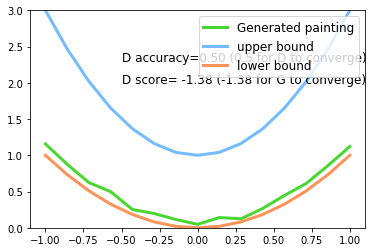

D_loss: Variable containing:
 1.3753
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6895
[torch.FloatTensor of size 1]



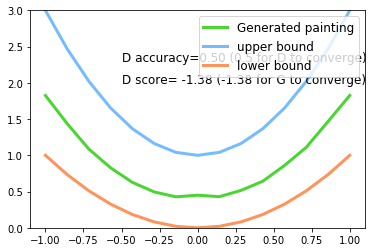

D_loss: Variable containing:
 1.3757
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6853
[torch.FloatTensor of size 1]



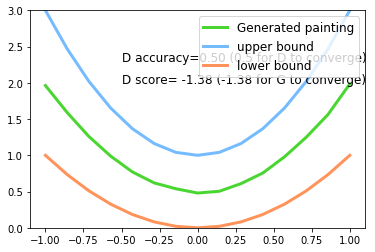

D_loss: Variable containing:
 1.3757
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6837
[torch.FloatTensor of size 1]



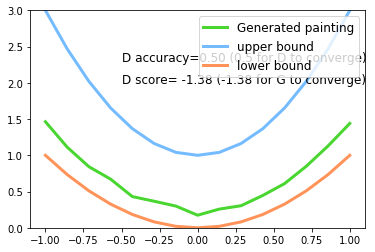

D_loss: Variable containing:
 1.3767
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6823
[torch.FloatTensor of size 1]



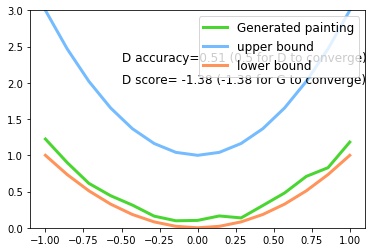

D_loss: Variable containing:
 1.3768
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6956
[torch.FloatTensor of size 1]



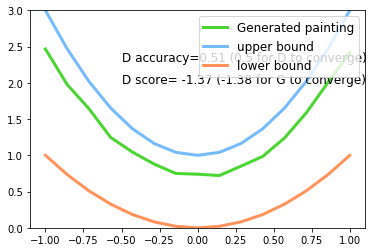

D_loss: Variable containing:
 1.3744
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6974
[torch.FloatTensor of size 1]



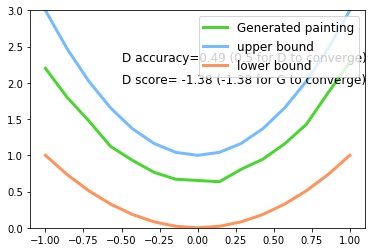

D_loss: Variable containing:
 1.3766
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6734
[torch.FloatTensor of size 1]



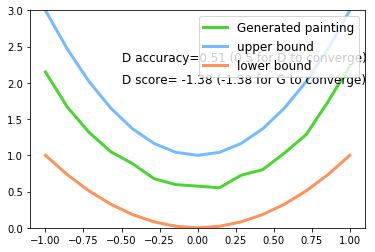

D_loss: Variable containing:
 1.3763
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6951
[torch.FloatTensor of size 1]



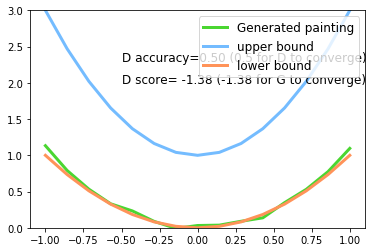

D_loss: Variable containing:
 1.3778
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6774
[torch.FloatTensor of size 1]



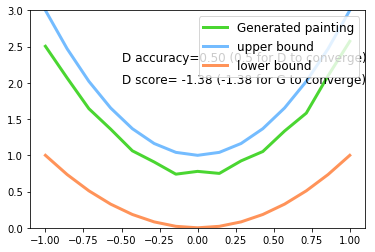

D_loss: Variable containing:
 1.3781
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6864
[torch.FloatTensor of size 1]



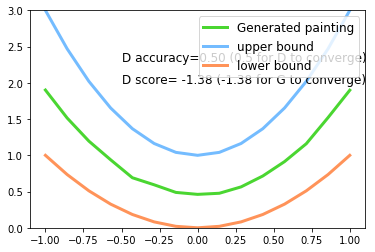

D_loss: Variable containing:
 1.3780
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6829
[torch.FloatTensor of size 1]



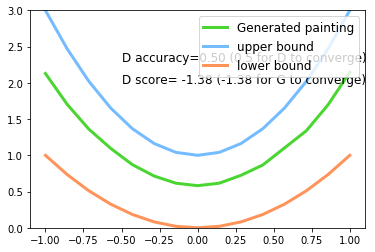

D_loss: Variable containing:
 1.3783
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6901
[torch.FloatTensor of size 1]



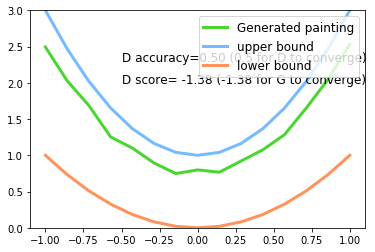

D_loss: Variable containing:
 1.3795
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6793
[torch.FloatTensor of size 1]



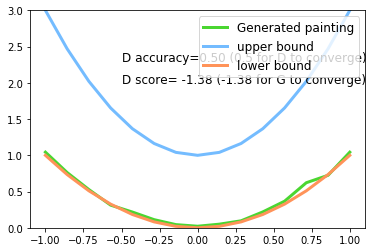

D_loss: Variable containing:
 1.3778
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6875
[torch.FloatTensor of size 1]



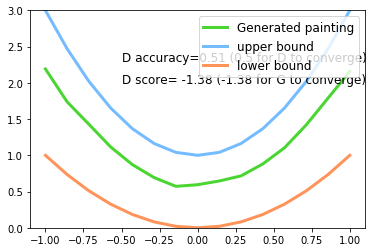

D_loss: Variable containing:
 1.3780
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6981
[torch.FloatTensor of size 1]



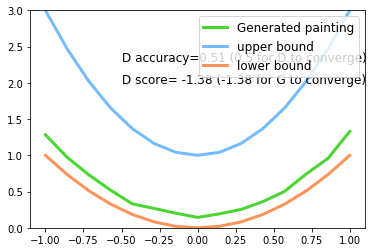

D_loss: Variable containing:
 1.3774
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6986
[torch.FloatTensor of size 1]



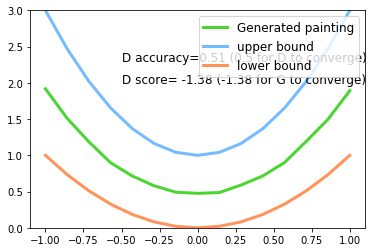

D_loss: Variable containing:
 1.3778
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6989
[torch.FloatTensor of size 1]



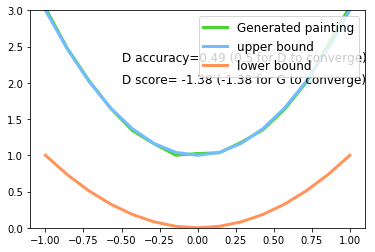

D_loss: Variable containing:
 1.3778
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6734
[torch.FloatTensor of size 1]



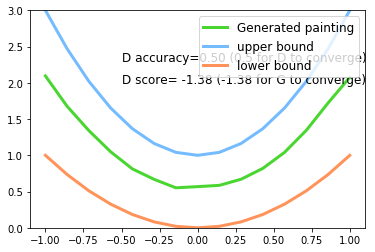

D_loss: Variable containing:
 1.3783
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6794
[torch.FloatTensor of size 1]



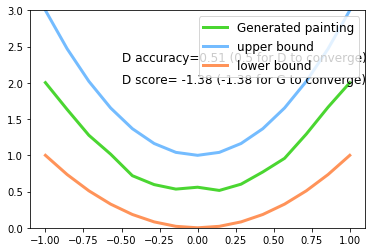

D_loss: Variable containing:
 1.3761
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6974
[torch.FloatTensor of size 1]



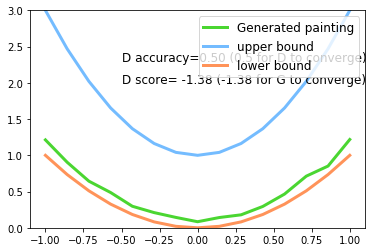

D_loss: Variable containing:
 1.3793
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6882
[torch.FloatTensor of size 1]



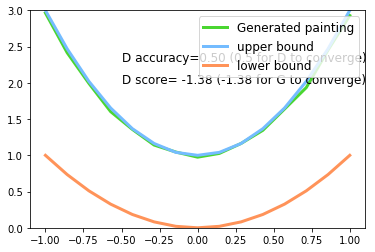

D_loss: Variable containing:
 1.3796
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6843
[torch.FloatTensor of size 1]



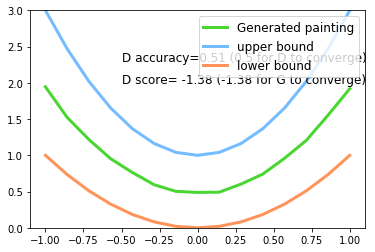

D_loss: Variable containing:
 1.3757
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6986
[torch.FloatTensor of size 1]



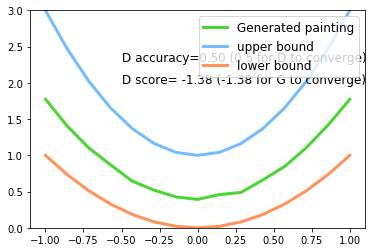

D_loss: Variable containing:
 1.3791
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6859
[torch.FloatTensor of size 1]



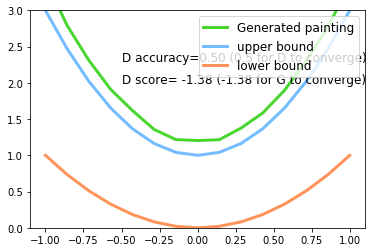

D_loss: Variable containing:
 1.3786
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6791
[torch.FloatTensor of size 1]



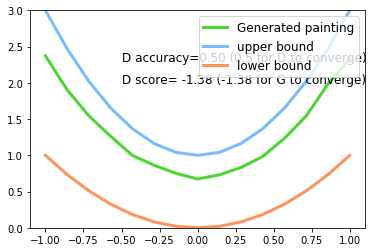

D_loss: Variable containing:
 1.3787
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6875
[torch.FloatTensor of size 1]



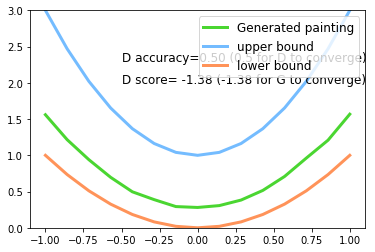

D_loss: Variable containing:
 1.3775
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6847
[torch.FloatTensor of size 1]



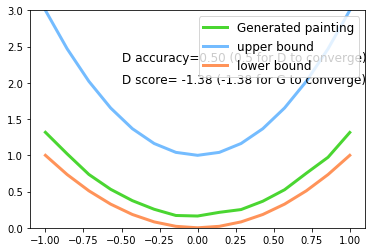

D_loss: Variable containing:
 1.3799
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6961
[torch.FloatTensor of size 1]



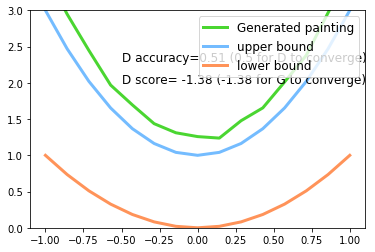

D_loss: Variable containing:
 1.3784
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6992
[torch.FloatTensor of size 1]



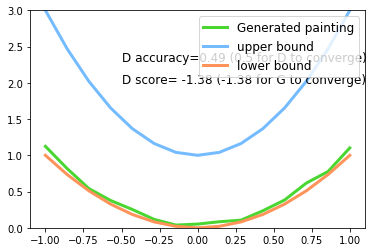

D_loss: Variable containing:
 1.3790
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6747
[torch.FloatTensor of size 1]



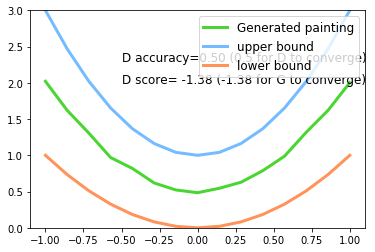

D_loss: Variable containing:
 1.3783
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6801
[torch.FloatTensor of size 1]



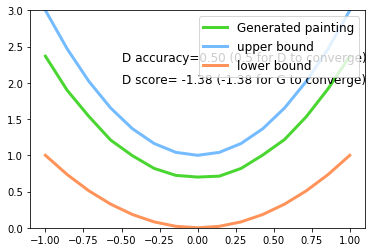

D_loss: Variable containing:
 1.3780
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6934
[torch.FloatTensor of size 1]



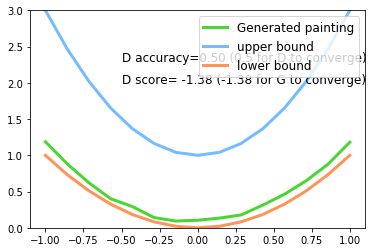

D_loss: Variable containing:
 1.3789
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6881
[torch.FloatTensor of size 1]



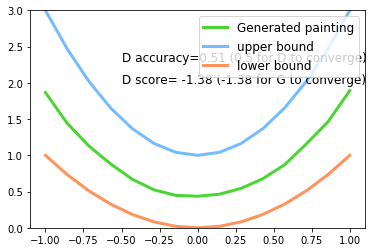

D_loss: Variable containing:
 1.3776
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6980
[torch.FloatTensor of size 1]



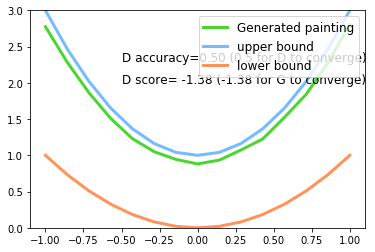

D_loss: Variable containing:
 1.3798
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6812
[torch.FloatTensor of size 1]



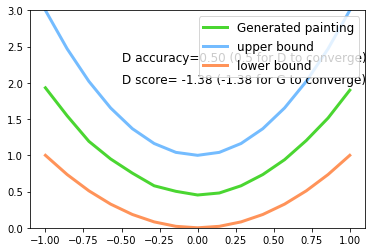

D_loss: Variable containing:
 1.3794
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6841
[torch.FloatTensor of size 1]



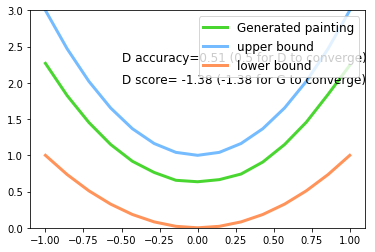

D_loss: Variable containing:
 1.3775
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6954
[torch.FloatTensor of size 1]



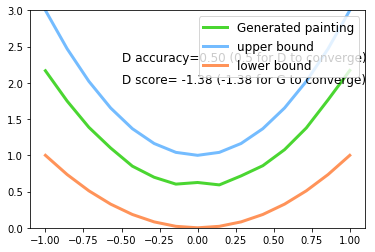

D_loss: Variable containing:
 1.3755
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6919
[torch.FloatTensor of size 1]



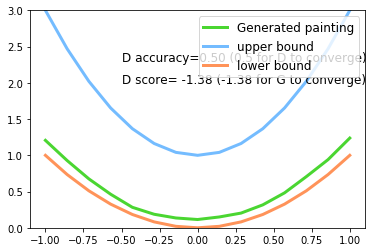

D_loss: Variable containing:
 1.3758
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6790
[torch.FloatTensor of size 1]



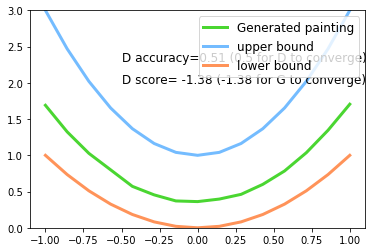

D_loss: Variable containing:
 1.3789
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6960
[torch.FloatTensor of size 1]



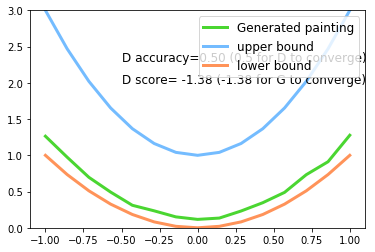

D_loss: Variable containing:
 1.3802
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6897
[torch.FloatTensor of size 1]



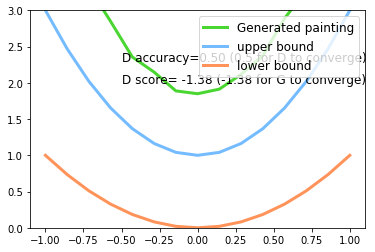

D_loss: Variable containing:
 1.3783
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6878
[torch.FloatTensor of size 1]



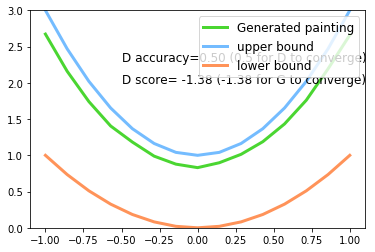

D_loss: Variable containing:
 1.3797
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6894
[torch.FloatTensor of size 1]



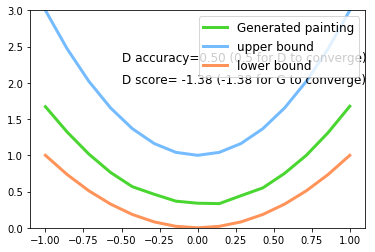

D_loss: Variable containing:
 1.3776
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6925
[torch.FloatTensor of size 1]



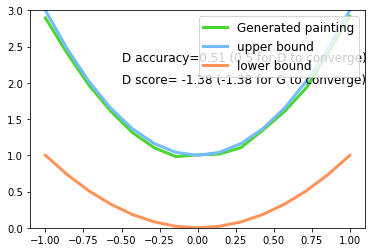

D_loss: Variable containing:
 1.3782
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7067
[torch.FloatTensor of size 1]



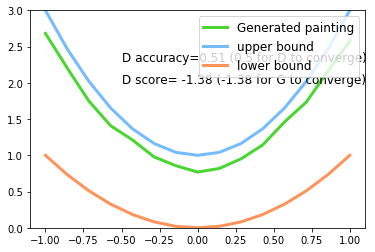

D_loss: Variable containing:
 1.3807
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7046
[torch.FloatTensor of size 1]



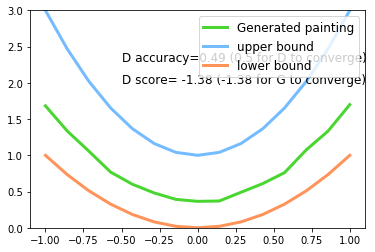

D_loss: Variable containing:
 1.3781
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6733
[torch.FloatTensor of size 1]



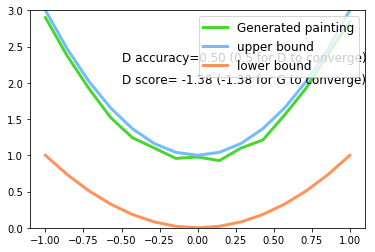

D_loss: Variable containing:
 1.3795
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6790
[torch.FloatTensor of size 1]



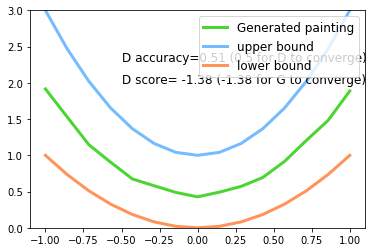

D_loss: Variable containing:
 1.3795
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7022
[torch.FloatTensor of size 1]



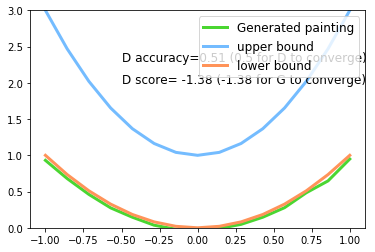

D_loss: Variable containing:
 1.3825
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7159
[torch.FloatTensor of size 1]



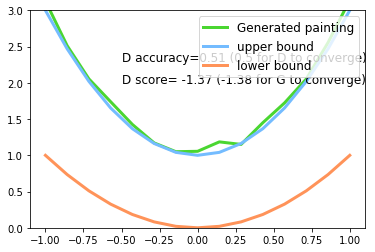

D_loss: Variable containing:
 1.3748
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7000
[torch.FloatTensor of size 1]



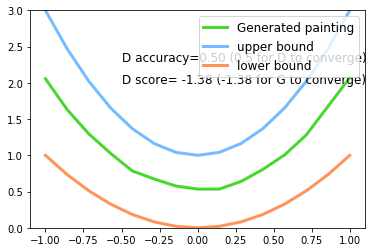

D_loss: Variable containing:
 1.3767
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6910
[torch.FloatTensor of size 1]



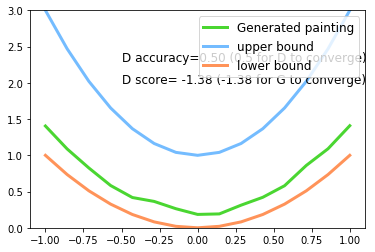

D_loss: Variable containing:
 1.3816
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6953
[torch.FloatTensor of size 1]



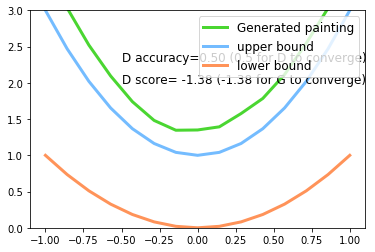

D_loss: Variable containing:
 1.3761
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6832
[torch.FloatTensor of size 1]



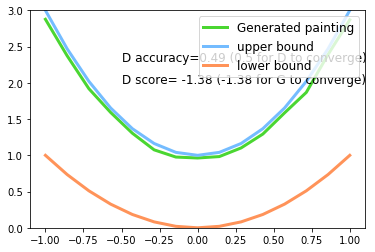

D_loss: Variable containing:
 1.3817
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6772
[torch.FloatTensor of size 1]



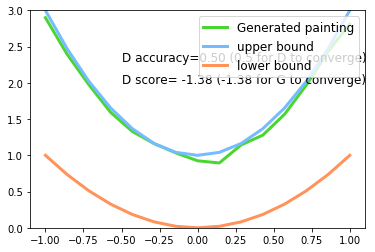

D_loss: Variable containing:
 1.3796
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6804
[torch.FloatTensor of size 1]



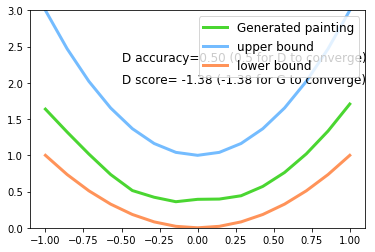

D_loss: Variable containing:
 1.3775
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6896
[torch.FloatTensor of size 1]



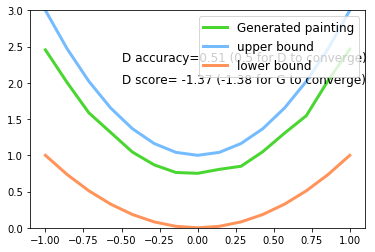

D_loss: Variable containing:
 1.3746
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6929
[torch.FloatTensor of size 1]



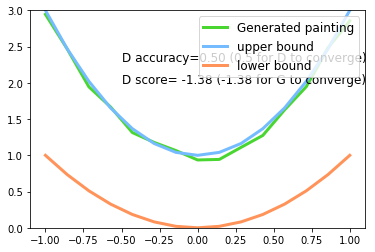

D_loss: Variable containing:
 1.3766
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6926
[torch.FloatTensor of size 1]



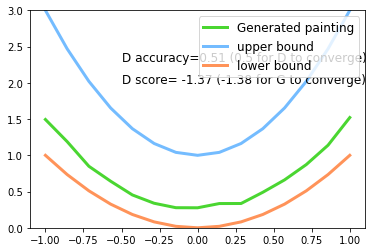

D_loss: Variable containing:
 1.3721
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6924
[torch.FloatTensor of size 1]



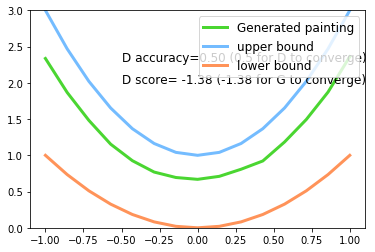

D_loss: Variable containing:
 1.3793
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6858
[torch.FloatTensor of size 1]



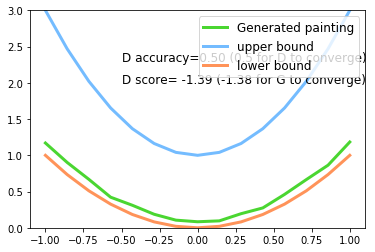

D_loss: Variable containing:
 1.3853
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6826
[torch.FloatTensor of size 1]



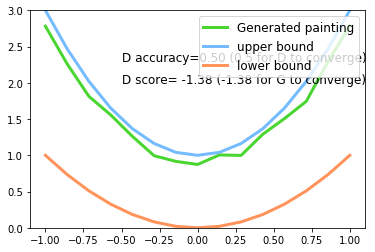

D_loss: Variable containing:
 1.3801
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6943
[torch.FloatTensor of size 1]



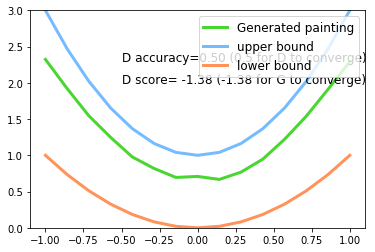

D_loss: Variable containing:
 1.3816
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6958
[torch.FloatTensor of size 1]



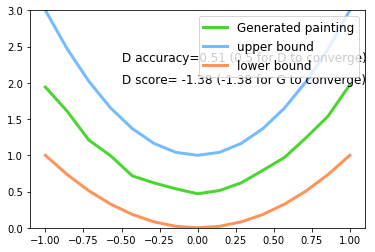

D_loss: Variable containing:
 1.3814
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6984
[torch.FloatTensor of size 1]



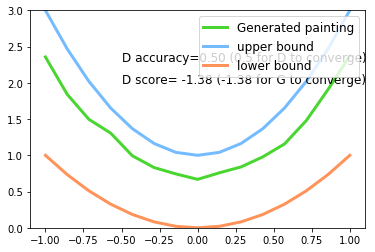

D_loss: Variable containing:
 1.3810
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6823
[torch.FloatTensor of size 1]



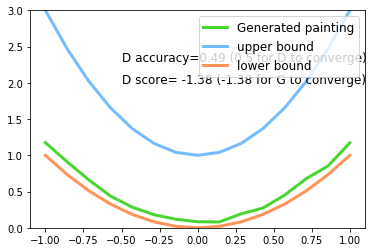

D_loss: Variable containing:
 1.3803
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6693
[torch.FloatTensor of size 1]



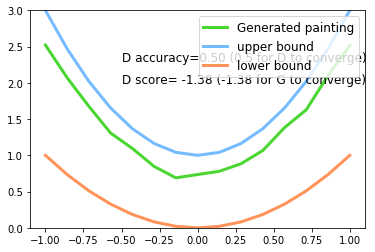

D_loss: Variable containing:
 1.3799
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6870
[torch.FloatTensor of size 1]



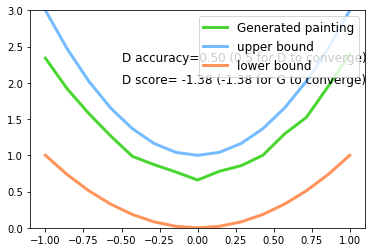

D_loss: Variable containing:
 1.3829
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6957
[torch.FloatTensor of size 1]



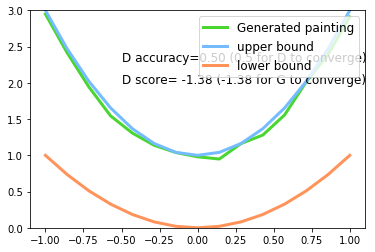

D_loss: Variable containing:
 1.3790
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6955
[torch.FloatTensor of size 1]



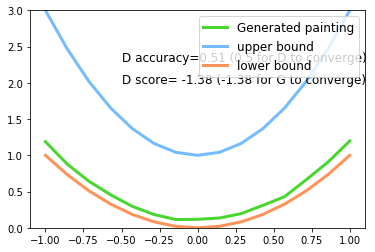

D_loss: Variable containing:
 1.3811
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7030
[torch.FloatTensor of size 1]



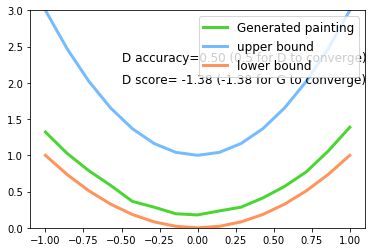

D_loss: Variable containing:
 1.3824
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6846
[torch.FloatTensor of size 1]



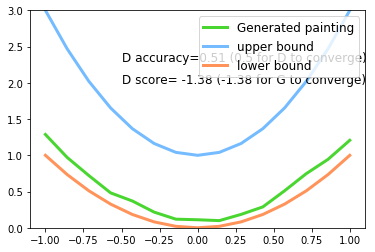

D_loss: Variable containing:
 1.3795
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7047
[torch.FloatTensor of size 1]



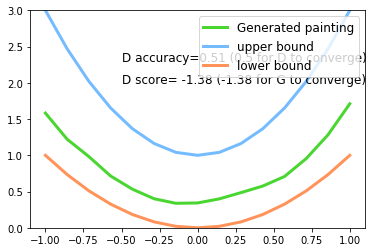

D_loss: Variable containing:
 1.3770
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6961
[torch.FloatTensor of size 1]



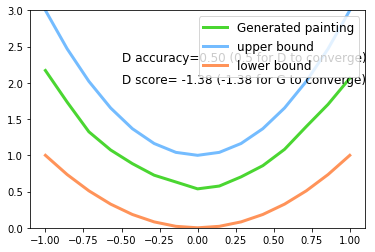

D_loss: Variable containing:
 1.3800
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6907
[torch.FloatTensor of size 1]



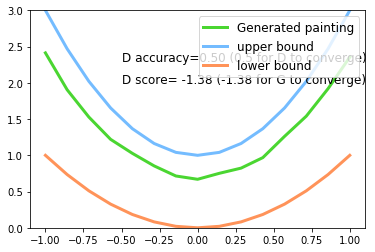

D_loss: Variable containing:
 1.3762
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6869
[torch.FloatTensor of size 1]



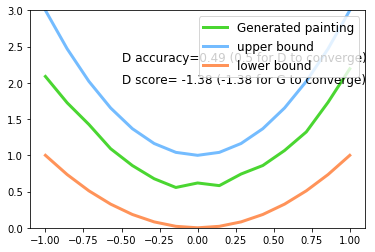

D_loss: Variable containing:
 1.3832
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6737
[torch.FloatTensor of size 1]



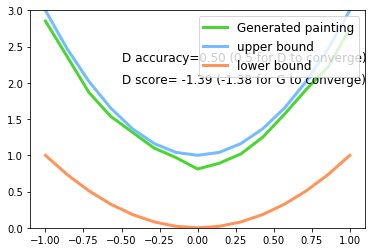

D_loss: Variable containing:
 1.3869
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6913
[torch.FloatTensor of size 1]



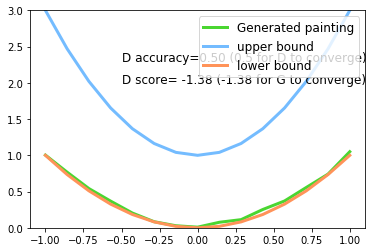

D_loss: Variable containing:
 1.3849
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6969
[torch.FloatTensor of size 1]



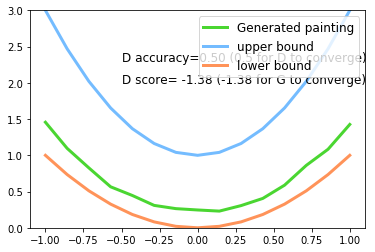

D_loss: Variable containing:
 1.3838
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6859
[torch.FloatTensor of size 1]



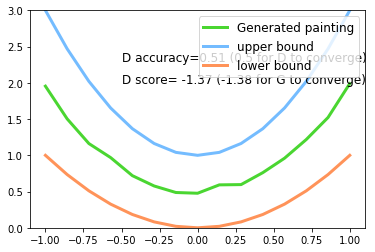

D_loss: Variable containing:
 1.3743
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6983
[torch.FloatTensor of size 1]



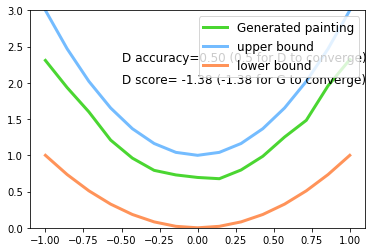

D_loss: Variable containing:
 1.3797
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6930
[torch.FloatTensor of size 1]



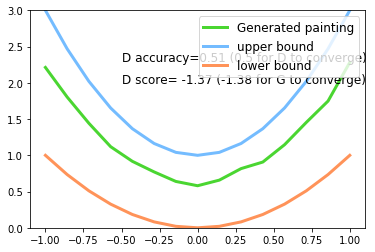

D_loss: Variable containing:
 1.3741
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7036
[torch.FloatTensor of size 1]



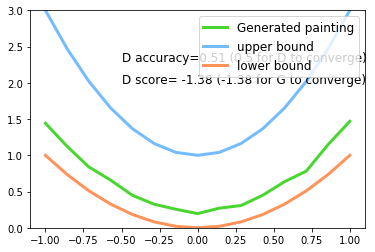

D_loss: Variable containing:
 1.3782
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6985
[torch.FloatTensor of size 1]



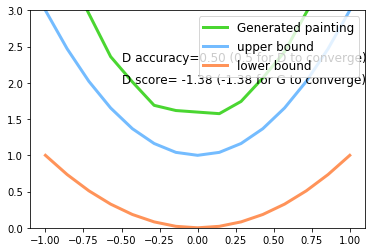

D_loss: Variable containing:
 1.3805
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6928
[torch.FloatTensor of size 1]



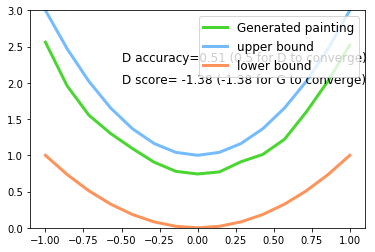

D_loss: Variable containing:
 1.3791
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7024
[torch.FloatTensor of size 1]



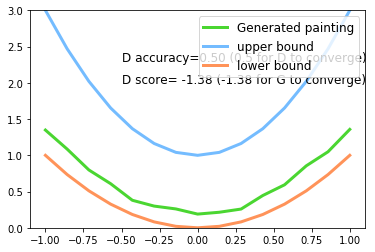

D_loss: Variable containing:
 1.3805
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6854
[torch.FloatTensor of size 1]



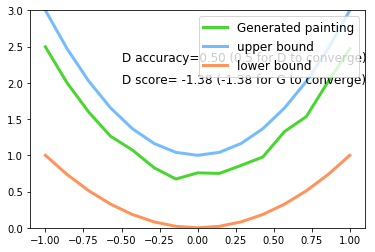

D_loss: Variable containing:
 1.3830
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6951
[torch.FloatTensor of size 1]



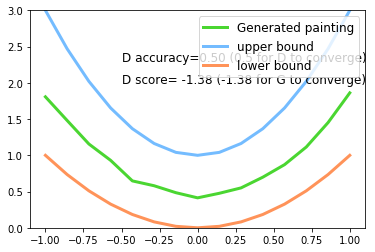

D_loss: Variable containing:
 1.3836
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6988
[torch.FloatTensor of size 1]



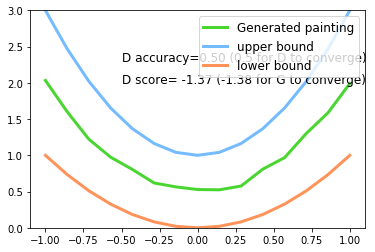

D_loss: Variable containing:
 1.3748
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6778
[torch.FloatTensor of size 1]



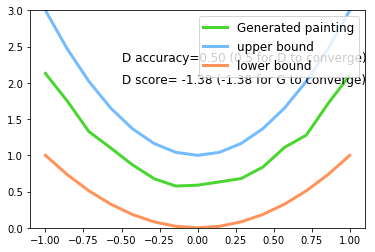

D_loss: Variable containing:
 1.3771
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6816
[torch.FloatTensor of size 1]



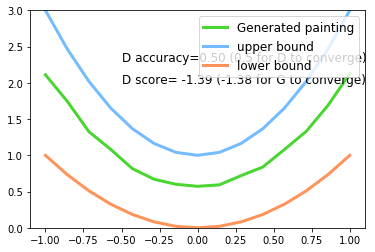

D_loss: Variable containing:
 1.3865
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6881
[torch.FloatTensor of size 1]



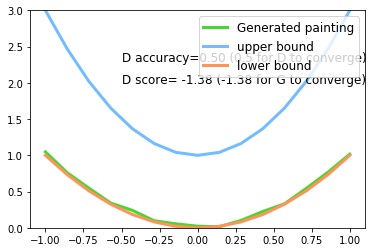

D_loss: Variable containing:
 1.3765
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6861
[torch.FloatTensor of size 1]



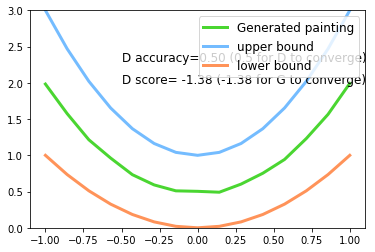

D_loss: Variable containing:
 1.3790
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6804
[torch.FloatTensor of size 1]



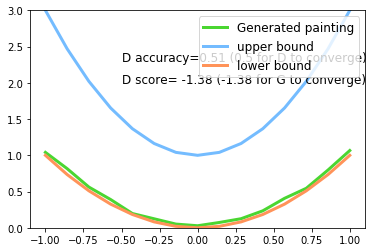

D_loss: Variable containing:
 1.3798
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7044
[torch.FloatTensor of size 1]



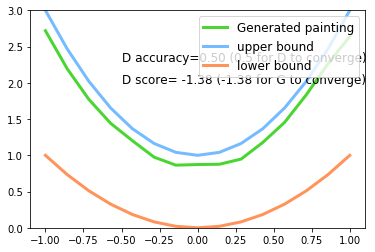

D_loss: Variable containing:
 1.3815
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6951
[torch.FloatTensor of size 1]



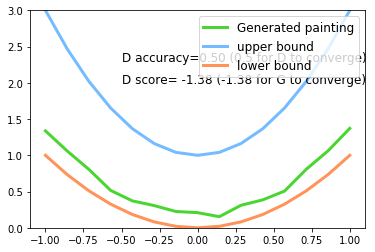

D_loss: Variable containing:
 1.3772
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6830
[torch.FloatTensor of size 1]



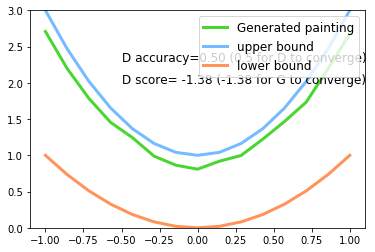

D_loss: Variable containing:
 1.3755
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6857
[torch.FloatTensor of size 1]



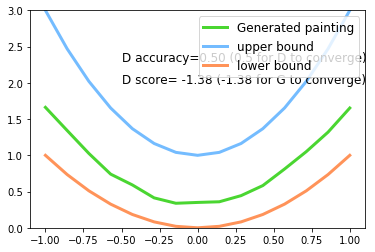

D_loss: Variable containing:
 1.3778
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6877
[torch.FloatTensor of size 1]



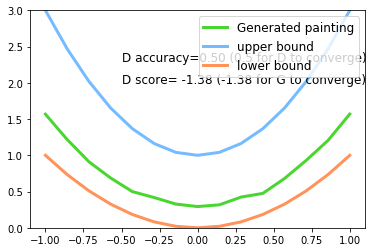

D_loss: Variable containing:
 1.3766
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6911
[torch.FloatTensor of size 1]



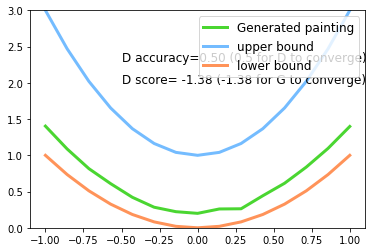

D_loss: Variable containing:
 1.3786
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6947
[torch.FloatTensor of size 1]



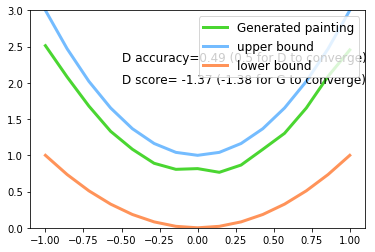

D_loss: Variable containing:
 1.3749
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6697
[torch.FloatTensor of size 1]



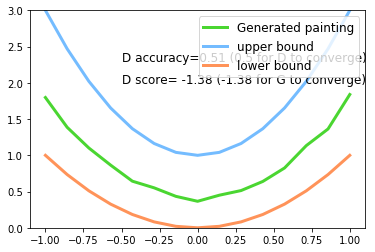

D_loss: Variable containing:
 1.3776
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6971
[torch.FloatTensor of size 1]



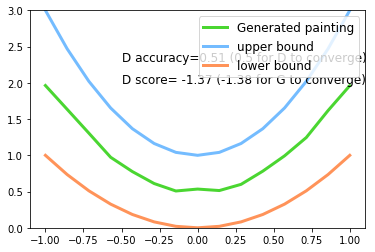

D_loss: Variable containing:
 1.3710
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6960
[torch.FloatTensor of size 1]



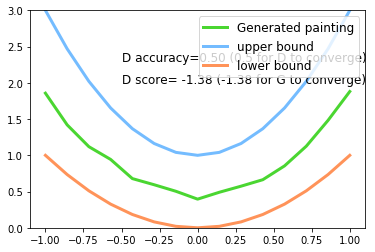

D_loss: Variable containing:
 1.3821
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6876
[torch.FloatTensor of size 1]



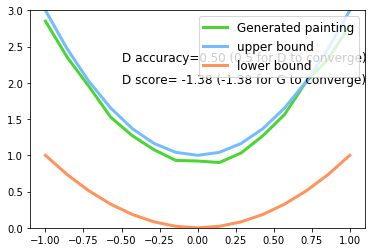

D_loss: Variable containing:
 1.3774
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6941
[torch.FloatTensor of size 1]



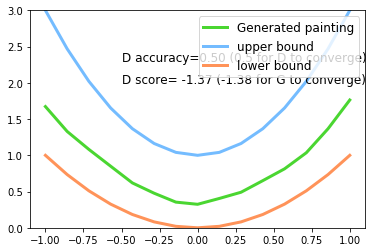

D_loss: Variable containing:
 1.3680
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6710
[torch.FloatTensor of size 1]



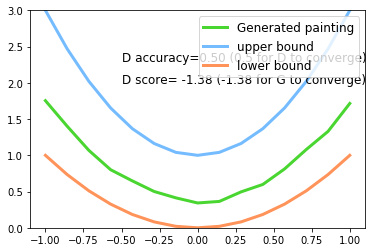

D_loss: Variable containing:
 1.3790
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6951
[torch.FloatTensor of size 1]



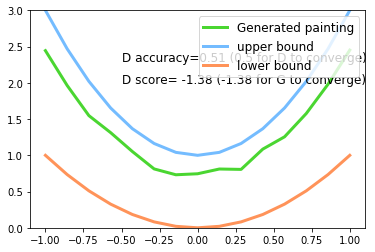

D_loss: Variable containing:
 1.3812
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7122
[torch.FloatTensor of size 1]



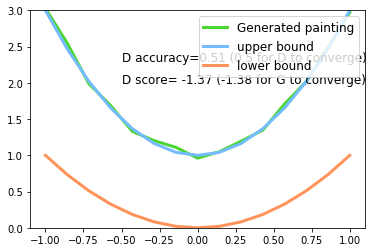

D_loss: Variable containing:
 1.3746
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6984
[torch.FloatTensor of size 1]



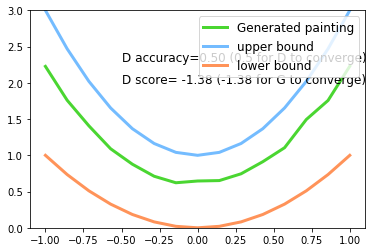

D_loss: Variable containing:
 1.3793
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6945
[torch.FloatTensor of size 1]



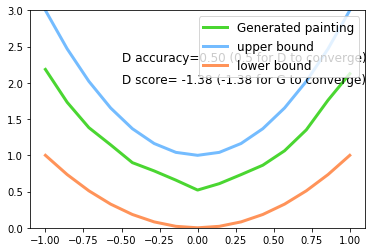

D_loss: Variable containing:
 1.3779
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6812
[torch.FloatTensor of size 1]



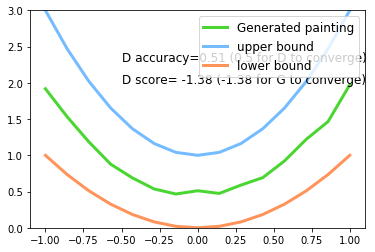

D_loss: Variable containing:
 1.3805
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.7092
[torch.FloatTensor of size 1]



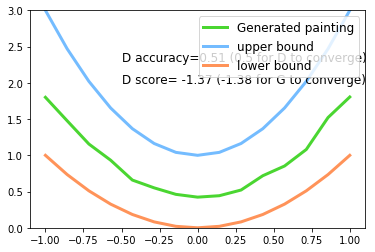

D_loss: Variable containing:
 1.3728
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6907
[torch.FloatTensor of size 1]



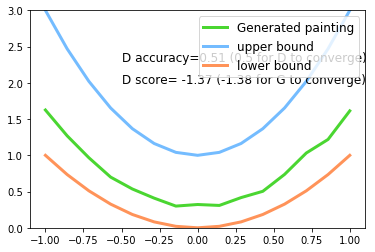

D_loss: Variable containing:
 1.3666
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6840
[torch.FloatTensor of size 1]



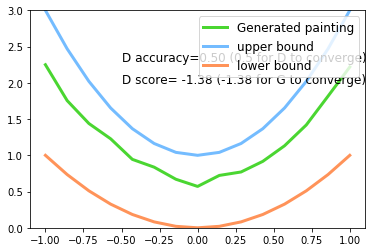

D_loss: Variable containing:
 1.3758
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6882
[torch.FloatTensor of size 1]



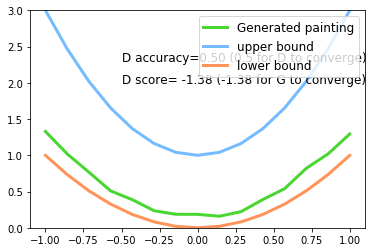

D_loss: Variable containing:
 1.3758
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6888
[torch.FloatTensor of size 1]



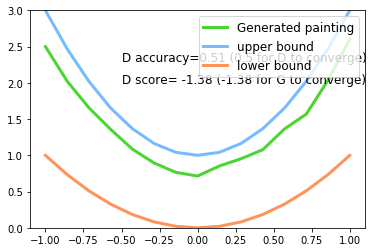

D_loss: Variable containing:
 1.3805
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6979
[torch.FloatTensor of size 1]



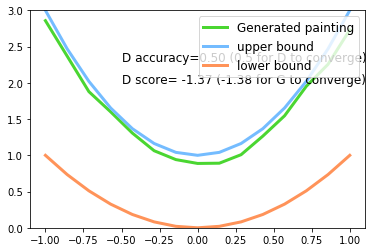

D_loss: Variable containing:
 1.3745
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6784
[torch.FloatTensor of size 1]



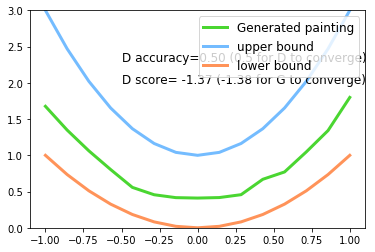

D_loss: Variable containing:
 1.3727
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6864
[torch.FloatTensor of size 1]



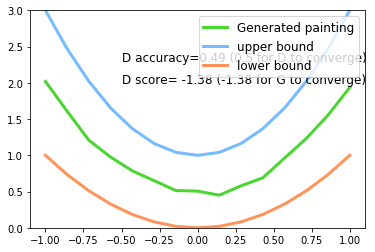

D_loss: Variable containing:
 1.3804
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6743
[torch.FloatTensor of size 1]



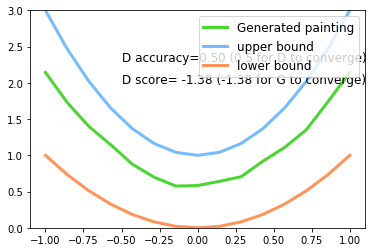

D_loss: Variable containing:
 1.3773
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6882
[torch.FloatTensor of size 1]



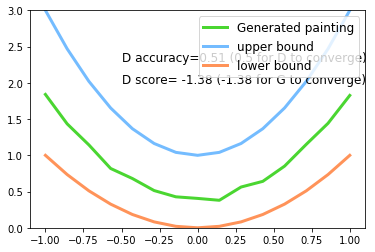

D_loss: Variable containing:
 1.3766
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6953
[torch.FloatTensor of size 1]



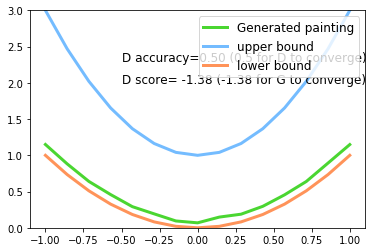

D_loss: Variable containing:
 1.3812
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6917
[torch.FloatTensor of size 1]



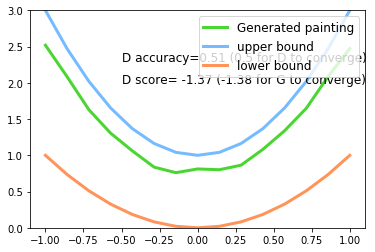

D_loss: Variable containing:
 1.3719
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6893
[torch.FloatTensor of size 1]



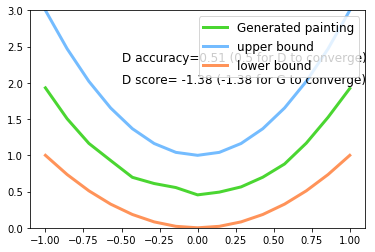

D_loss: Variable containing:
 1.3759
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6966
[torch.FloatTensor of size 1]



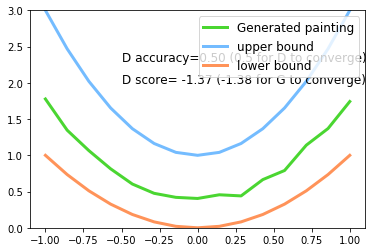

D_loss: Variable containing:
 1.3746
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6877
[torch.FloatTensor of size 1]



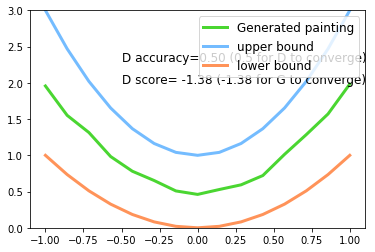

D_loss: Variable containing:
 1.3772
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6851
[torch.FloatTensor of size 1]



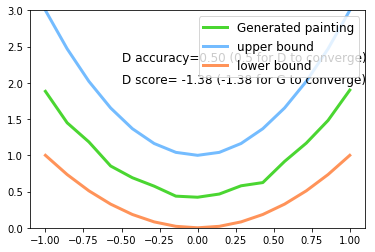

D_loss: Variable containing:
 1.3821
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6883
[torch.FloatTensor of size 1]



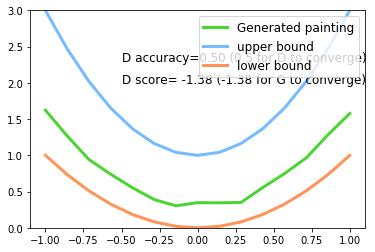

D_loss: Variable containing:
 1.3800
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6930
[torch.FloatTensor of size 1]



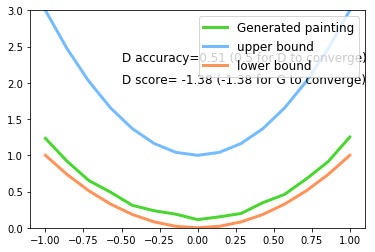

D_loss: Variable containing:
 1.3810
[torch.FloatTensor of size 1]

G_loss: Variable containing:
-0.6992
[torch.FloatTensor of size 1]



In [5]:
opt_D = torch.optim.Adam(Discriminator.parameters(),lr=LR_D)
opt_G = torch.optim.Adam(Generator.parameters(),lr=LR_G)

plt.ion()

G_losses = []
D_losses = []
for step in range(10000):
    artist_paintings = artist_works()
    G_ideas = Variable(torch.randn(BATCH_SIZE,N_IDEAS))
    G_paintings = Generator(G_ideas)
    
    prob_artist0 = Discriminator(artist_paintings)
    prob_artist1 = Discriminator(G_paintings)
    
    D_loss = -torch.mean(torch.log(prob_artist0)+torch.log(1.-prob_artist1))
    G_loss = torch.mean(torch.log(1-prob_artist1))
    
    opt_D.zero_grad()
    D_loss.backward(retain_graph=True)
    opt_D.step()
    
    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()

    if step % 50 == 0:  # plotting
        plt.cla()
        plt.plot(PAINT_POINTS[0], G_paintings.data.numpy()[0], c='#4AD631', lw=3, label='Generated painting',)
        plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
        plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
        plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % prob_artist0.data.numpy().mean(), fontdict={'size': 12})
        plt.text(-.5, 2, 'D score= %.2f (-1.38 for G to converge)' % -D_loss.data.numpy(), fontdict={'size': 12})
        plt.ylim((0, 3));plt.legend(loc='upper right', fontsize=12);plt.draw();plt.pause(0.01)
        G_losses.append(float(G_loss[0]))
        D_losses.append(float(D_loss[0]))
        print('D_loss:',D_loss[0])
        print('G_loss:',G_loss[0])
        #print('G_losses:',G_losses)
        #print('D_losses:',D_losses)

D_loss: float64


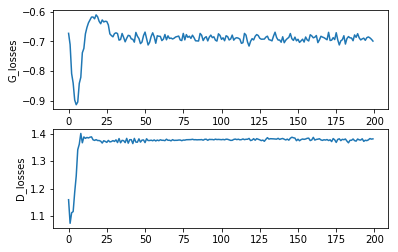

In [6]:
#print(G_losses)
G_losses = np.array(G_losses)
D_losses = np.array(D_losses)
print('D_loss:',D_losses.dtype) 
x=np.linspace(0,199,200)
plt.ioff()
plt.subplot(211)
plt.plot(x,G_losses,label='G_losses')
plt.ylabel('G_losses')
plt.subplot(212)
plt.plot(x,D_losses,label='D_losses')
plt.ylabel('D_losses')
plt.show()

然后计算有多少来之画家的画猜对了, 有多少来自 G 的画猜对了, 我们想最大化这些猜对的次数. 这也就是 log(D(x)) + log(1-D(G(z)) 在论文中的形式. 而因为 torch 中提升参数的形式是最小化误差, 那我们把最大化 score 转换成最小化 loss, 在两个 score 的合的地方加一个符号就好. 而 G 的提升就是要减小 D 猜测 G 生成数据的正确率, 也就是减小 D_score1.